In [2]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics
import pandas as pd
import numpy as np
np.random.seed(0)
from sklearn.model_selection import GridSearchCV, StratifiedKFold  # , cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, precision_recall_fscore_support, confusion_matrix  # , classification_report
from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score


In [3]:
DATA_PATH = "./data/"
RED = DATA_PATH + "just_red/"

In [4]:
diego_t = pd.read_pickle(DATA_PATH+"/features/T_flux_diego.pickle")
print(diego_t.shape)

(46959, 32)


In [5]:
diego_t['FClass'] = diego_t['Class']=="SN"

In [6]:
diego_t["fact_Class"] = pd.factorize(diego_t['FClass'])[0]

In [7]:
diego_t


,,Class,ObsCount,amplitude,beyond1st,flux_percentile_ratio_mid20,flux_percentile_ratio_mid35,flux_percentile_ratio_mid50,flux_percentile_ratio_mid65,flux_percentile_ratio_mid80,kurtosis,...,poly4_t2,poly4_t3,poly4_t4,skew,small_kurtosis,std,stetson_j,stetson_k,FClass,fact_Class
ID,copy_num,,,,,,,,,,,,,,,,,,,,,
TranID1409030010044114444,0,SN?,13,6.606619e-20,0.461538,0.067363,0.145074,0.159700,0.296120,0.519169,0,...,-4.924016e-26,-3.251950e-29,4.063888e-32,0,-3.927273,3.625611e-20,2.653184,0.674821,False,0
TranID1209210010044118805,0,Flare,68,4.046382e-17,0.279412,0.043604,0.077573,0.111773,0.140895,0.215354,0,...,7.742926e-24,1.676101e-28,-3.274201e-30,0,-3.139161,9.811163e-18,351.818004,0.715629,False,0
TranID1310250040014131234,0,SN,185,4.205281e-18,0.313514,0.025245,0.061235,0.082459,0.126591,0.314544,0,...,-1.044870e-24,5.970998e-28,6.915890e-31,0,-3.049541,1.364362e-18,21.488547,0.663141,True,1
TranID801010040034114166,0,Var?,26,1.704704e-19,0.423077,0.178109,0.267323,0.307942,0.636355,0.910583,0,...,8.845517e-26,4.664982e-30,-3.847573e-32,0,-3.396739,6.714612e-20,5.465193,0.710980,False,0
TranID1011080040044131101,0,SN,41,3.023817e-19,0.292683,0.031154,0.055487,0.073229,0.405480,0.874745,0,...,-1.303991e-25,-2.135346e-29,6.109557e-32,0,-3.238866,1.047484e-19,10.394458,0.710591,True,1
TranID909190070024118250,0,SN,30,2.805522e-19,0.433333,0.057658,0.084192,0.255140,0.528230,0.792662,0,...,-2.624841e-25,-2.980138e-29,1.066501e-31,0,-3.337302,1.053172e-19,9.436117,0.621682,True,1
TranID1310250070034110542,0,SN,100,4.211327e-19,0.280000,0.015264,0.033555,0.046226,0.089809,0.201485,0,...,-3.699180e-26,1.441712e-28,7.679276e-32,0,-3.093099,1.637954e-19,6.662745,0.705932,True,1
TranID1209150070034133708,0,SN,27,6.110366e-17,0.222222,0.038486,0.089060,0.175890,0.445525,0.821929,0,...,7.430322e-23,-1.988077e-27,-2.902866e-29,0,-3.380000,2.351585e-17,1211.854923,0.719491,True,1
TranID1201030070034134767,0,Blazar,288,1.295275e-15,0.204861,0.002043,0.004505,0.008010,0.161197,0.237995,0,...,1.090067e-22,8.514669e-27,-4.582940e-29,0,-3.031616,1.528479e-16,138.320934,0.814395,False,0


In [8]:
all_train, all_test= train_test_split(diego_t,test_size = 0.25)

In [9]:
all_test = all_test.sample(frac=1)
all_train = all_train.sample(frac=1)


In [10]:
features = all_train.columns[2:-2]
print(features)
y_train = np.array(all_train['fact_Class'])
y_test = np.array(all_test['fact_Class'])

Index(['amplitude', 'beyond1st', 'flux_percentile_ratio_mid20',
       'flux_percentile_ratio_mid35', 'flux_percentile_ratio_mid50',
       'flux_percentile_ratio_mid65', 'flux_percentile_ratio_mid80',
       'kurtosis', 'max_slope', 'median_absolute_deviation',
       'median_buffer_range_percentage', 'pair_slope_trend',
       'pair_slope_trend_last_30', 'percent_amplitude',
       'percent_difference_flux_percentile', 'poly1_t1', 'poly2_t1',
       'poly2_t2', 'poly3_t1', 'poly3_t2', 'poly3_t3', 'poly4_t1', 'poly4_t2',
       'poly4_t3', 'poly4_t4', 'skew', 'small_kurtosis', 'std', 'stetson_j',
       'stetson_k'],
      dtype='object')


In [11]:
print(len(y_train))
print(len(y_test))


35219
11740


In [12]:
clf = RandomForestClassifier(n_estimators=50,random_state=0, class_weight='balanced')

In [13]:
clf.fit(all_train[features], y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [14]:
y_test = np.array(all_test['fact_Class'])

In [15]:
clf.score(all_test[features],y_test)

1.0

In [16]:
preds1 = clf.predict_proba(all_test[features])
print(preds1)

[[1.         0.        ]
 [0.98697556 0.01302444]
 [1.         0.        ]
 ...
 [1.         0.        ]
 [0.98697556 0.01302444]
 [0.96697556 0.03302444]]


Text(0,0.5,'precision')

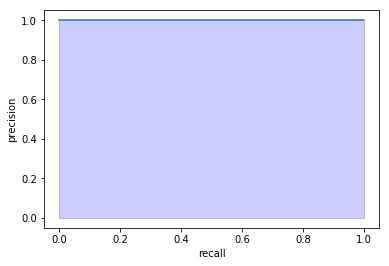

In [17]:
preds1 = clf.predict_proba(all_test[features])
precision, recall, _ = precision_recall_curve(y_test, preds1[:,0],pos_label=0)

plt.step(recall,precision)
plt.fill_between(recall, precision,step='pre', alpha=0.2,
                 color='b')
plt.xlabel('recall')
plt.ylabel('precision')


In [18]:
print(precision)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


In [19]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [20]:
preds = clf.predict(all_test[features])

In [21]:
pd.crosstab(preds, y_test, rownames=['Predicted '], colnames=['Actual '])

Actual,0,1
Predicted,,
0,8188,0
1,0,3552


In [22]:
dfs = {}
for clase in diego_t.reset_index().Class.unique():
    dfs[clase] = diego_t[diego_t['Class']==clase]

In [23]:
numObjs = {}
for k in dfs.keys():
    numObjs[k] = len(dfs[k])

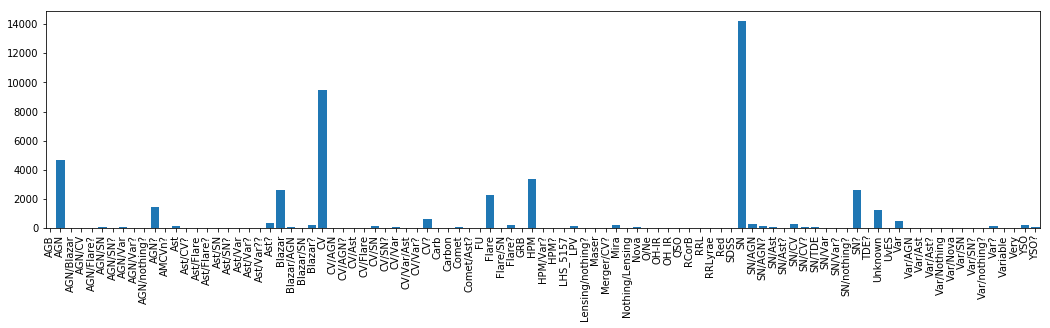

In [24]:
plt.bar(numObjs.keys(),numObjs.values())
plt.xticks(rotation='vertical')

N = len(numObjs)
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.2 # inch margin
s = maxsize/plt.gcf().dpi*N+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])
